#  Fruits: Retail Prices of Agricultural Commodities by Geolocation, Commodity, Year and Period
Problems: 
1. What fruit prices are expected to increase and decrease?
2. What place/s sell fruits at higher prices
3. Does seasons affect fruit prices

Goal:
1. Find the specialty of each province.
2. Forecast fruit prices.
3. Find out the effect of seasons on fruit prices.

dataset from:\
https://openstat.psa.gov.ph/PXWeb/pxweb/en/DB/DB__2M__2018/0042M4ARA07.px/?rxid=7d5d3588-67ae-4206-8670-09322cda2f17

# Methodology
1. Reading and Understanding the Data\
a. Creating a Data Dictionary
2. Data Cleaning
3. Data Preparation
4. Statistical Data Analysis\
a. Univariate Analysis\
b. Bivariate Analysis
5. Final Analysis

### 1. Reading and Understanding the Data

In [1]:
# import libraries for dataframe and visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# 1. Reading the data on which analysis needs to be done

df = pd.read_excel("Retail prices of fruits by region 2018-2024.xlsx", header=3)
df = df[:-31]

df.tail(5)

,Unnamed: 0,Unnamed: 1,January,February,March,April,May,June,July,August,...,April.6,May.6,June.6,July.6,August.6,September.6,October.6,November.6,December.6,Annual.6
643,NaN,"FRESH FRUIT, MANDARIN, DALANGHITA, MEDIUM, 1 KG",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
644,NaN,"CALAMANSI, LOOSE, 1 KG",119.9,119.9,130.43,119.89,119.89,121.5,120.22,120.97,...,56.17,56.67,58.46,56.78,56.71,57.57,..,..,..,..
645,NaN,"FRESH FRUIT, APPLE, RED DELICIOUS, MEDIUM, 1 KG",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
646,NaN,"FRESH FRUIT, CANTALOUPE, MELON, MEDIUM, 1 KG",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
647,NaN,"FRESH FRUIT, WATERMELON, PAKWAN, MEDIUM, 1 KG",18.51,18.51,17.77,19.75,19.75,19.75,19.75,19.75,...,34.58,33.33,31,31.67,31.33,33.5,..,..,..,..


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 93 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   18 non-null     object
 1   Unnamed: 1   648 non-null    object
 2   January      648 non-null    object
 3   February     648 non-null    object
 4   March        648 non-null    object
 5   April        648 non-null    object
 6   May          648 non-null    object
 7   June         648 non-null    object
 8   July         648 non-null    object
 9   August       648 non-null    object
 10  September    648 non-null    object
 11  October      648 non-null    object
 12  November     648 non-null    object
 13  December     648 non-null    object
 14  Annual       648 non-null    object
 15  January.1    648 non-null    object
 16  February.1   648 non-null    object
 17  March.1      648 non-null    object
 18  April.1      648 non-null    object
 19  May.1        648 non-null    

In [4]:
df.describe()

,Unnamed: 0,Unnamed: 1,January,February,March,April,May,June,July,August,...,April.6,May.6,June.6,July.6,August.6,September.6,October.6,November.6,December.6,Annual.6
count,18,648,648,648,648,648,648,648,648,648,...,648,648,648,648,648,648,648,648,648,648
unique,18,36,288,286,288,289,287,287,288,287,...,283,281,278,270,280,278,1,1,1,1
top,PHILIPPINES,"FRESH FRUIT, AVOCADO, 1 KG",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,1,18,358,358,358,358,358,358,358,358,...,358,358,358,358,358,358,648,648,648,648


In [5]:
df.replace("..", np.nan, inplace=True)

<Axes: >

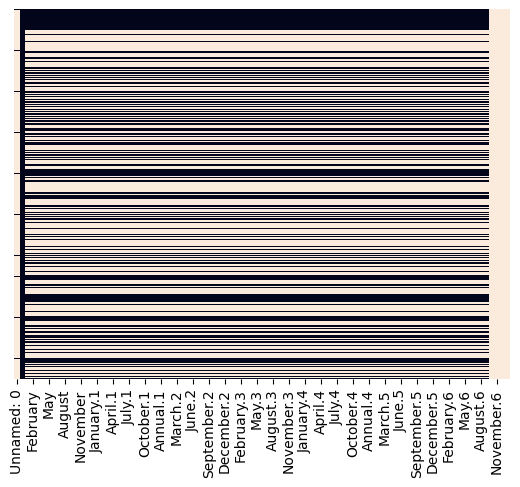

In [6]:
# check for nulls
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [7]:
df.tail(5)

,Unnamed: 0,Unnamed: 1,January,February,March,April,May,June,July,August,...,April.6,May.6,June.6,July.6,August.6,September.6,October.6,November.6,December.6,Annual.6
643,NaN,"FRESH FRUIT, MANDARIN, DALANGHITA, MEDIUM, 1 KG",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,NaN,"CALAMANSI, LOOSE, 1 KG",119.90,119.90,130.43,119.89,119.89,121.50,120.22,120.97,...,56.17,56.67,58.46,56.78,56.71,57.57,NaN,NaN,NaN,NaN
645,NaN,"FRESH FRUIT, APPLE, RED DELICIOUS, MEDIUM, 1 KG",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646,NaN,"FRESH FRUIT, CANTALOUPE, MELON, MEDIUM, 1 KG",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,NaN,"FRESH FRUIT, WATERMELON, PAKWAN, MEDIUM, 1 KG",18.51,18.51,17.77,19.75,19.75,19.75,19.75,19.75,...,34.58,33.33,31.00,31.67,31.33,33.50,NaN,NaN,NaN,NaN


In [8]:
# Calculating the Missing Values % contribution in DF
df_null = round(100*(df.isnull().sum())/len(df), 2)
# Convert the Series to a DataFrame and display it
df_null = df_null.reset_index()
df_null.columns = ['Column', 'Percentage']
df_null

,Column,Percentage
0,Unnamed: 0,97.22
1,Unnamed: 1,0.00
2,January,55.25
3,February,55.25
4,March,55.25
...,...,...
88,September.6,55.25
89,October.6,100.00
90,November.6,100.00
91,December.6,100.00


In [9]:
# Forward-fill the regions (Unnamed: 0) and product names (Unnamed: 1) to deal with the multi-level structure
df['Unnamed: 0'].fillna(method='ffill', inplace=True)  # Regions
df['Unnamed: 1'].fillna(method='ffill', inplace=True)  # Products


df.rename(columns={'Unnamed: 0': 'Region', 'Unnamed: 1': 'Product'}, inplace=True)

df_csv_cleaned = df.loc[:, ~df.columns.str.contains('Annual')]

years = []
current_year = 2018  

for col in df_csv_cleaned.columns[2:]:  
    if 'January' in col:
        years.append(str(current_year))
        current_year += 1
    else:
        years.append(str(current_year - 1))  

# Assign the months in a repeating sequence (January to December)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_repeated = months * (len(df_csv_cleaned.columns[2:]) // 12)

# Create a MultiIndex for the columns with Year and Month
df_csv_cleaned.columns = pd.MultiIndex.from_tuples([('Region', ''), ('Product', '')] + list(zip(years, months_repeated)))

# Melt the data with Region and Product as identifiers
df_melted_csv = pd.melt(
    df_csv_cleaned, 
    id_vars=['Region', 'Product'], 
    var_name=['Year', 'Month'], 
    value_name='Price'
)

# Replace '..' with NaN and drop rows where Price is NaN
df_melted_csv.replace('..', pd.NA, inplace=True)
df_melted_csv.dropna(subset=['Price'], inplace=True)

df_melted_csv.head() 

C:\Users\Luke Santibanez\AppData\Local\Temp\ipykernel_20060\3110730149.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\Luke Santibanez\AppData\Local\Temp\ipykernel_20060\3110730149.py:3: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,Region,Product,Year,Month,Price
0,PHILIPPINES,"FRESH FRUIT, AVOCADO, 1 KG",2018,January,63.90
1,PHILIPPINES,"FRESH FRUIT, BANANA, CARDAVA, MEDIUM, 1 KG",2018,January,26.68
2,PHILIPPINES,"FRESH FRUIT, BANANA, LAKATAN, MEDIUM, 1 KG",2018,January,52.06
3,PHILIPPINES,"FRESH FRUIT, BANANA, LATUNDAN, MEDIUM, 1 KG",2018,January,36.55
4,PHILIPPINES,"FRESH FRUIT, BANANA, SABA, MEDIUM, 1 KG",2018,January,32.33
